In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.manifold import TSNE

# Кластеризация методом `K-means` для выделения групп объектов

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [ ]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

Пример вывода нескольких объектов и соответствующих меток классов:

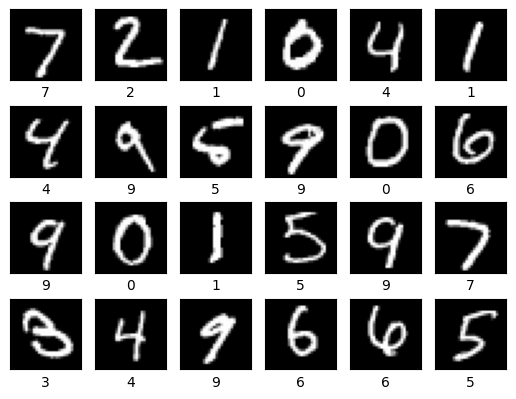

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Введите <code>.shape</code> полученного набора данных

In [ ]:
X.shape

(10000, 28, 28)

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [ ]:
# «Распрямите» изображения
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Обучите алгоритм KMeans
kmeans = KMeans(n_clusters=10, random_state=41) #  n_init=10 -  для большей стабильности
kmeans.fit(X_train_reshaped)

KMeans(n_clusters=10, random_state=41)

Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [ ]:
labels = kmeans.labels_
cluster_9_count = np.sum(labels == 9)
print(f"Number of elements in cluster 9: {cluster_9_count}")

Number of elements in cluster 9: 1205


Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



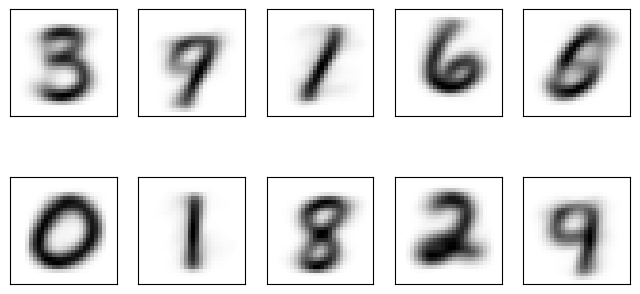

In [ ]:
# Постройте изображения, соответствующие центроидам полученных кластеров.
fig, ax = plt.subplots(2, 5, figsize=(8, 4))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

Accuracy after mapping: 0.594625
Cluster mapping:
Cluster 0: 3
Cluster 1: 7
Cluster 2: 1
Cluster 3: 6
Cluster 4: 5
Cluster 5: 0
Cluster 6: 1
Cluster 7: 8
Cluster 8: 2
Cluster 9: 4


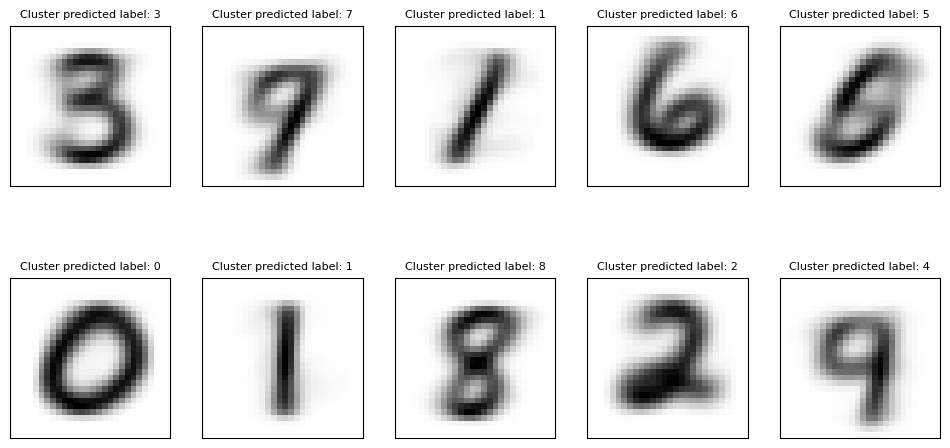

In [ ]:
# Предположим, что у вас есть labels (метки кластеров) и y_train (истинные метки)
# labels - это результат kmeans.labels_
# y_train - это истинные метки из обучающей выборки

# Создаем словарь для хранения соответствия между кластерами и наиболее частыми метками
cluster_mapping = {}
for i in range(10):
    cluster_indices = np.where(labels == i)
    true_labels_in_cluster = y_train[cluster_indices]
    most_common_label = Counter(true_labels_in_cluster).most_common(1)[0][0]
    cluster_mapping[i] = most_common_label

# Преобразуем метки кластеров в соответствии с mapping
new_labels = np.array([cluster_mapping[label] for label in labels])

# Вычисляем точность
accuracy = accuracy_score(y_train, new_labels)
print(f"Accuracy after mapping: {accuracy}")

# Выводим mapping
print("Cluster mapping:")
for cluster_id, true_label in cluster_mapping.items():
    print(f"Cluster {cluster_id}: {true_label}")

# Сравниваем с изображениями центроидов
# (Здесь вам нужно визуализировать центроиды и сравнить с mapping)

fig, ax = plt.subplots(2, 5, figsize=(12, 6))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center, true_label in zip(ax.flat, centers, cluster_mapping.values()):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
  axi.set_title(f"Cluster predicted label: {true_label}", fontsize=8)
plt.show()

При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [ ]:
# Предсказываем кластеры для тестовых данных
test_labels = kmeans.predict(X_test_reshaped)

# Переименовываем метки предсказанных кластеров
new_test_labels = np.array([cluster_mapping[label] for label in test_labels])

# Вычисляем точность для тестовых данных
test_accuracy = accuracy_score(y_test, new_test_labels)
print(f"Test accuracy after mapping: {test_accuracy}")

Test accuracy after mapping: 0.602


Постройте матрицу ошибок.

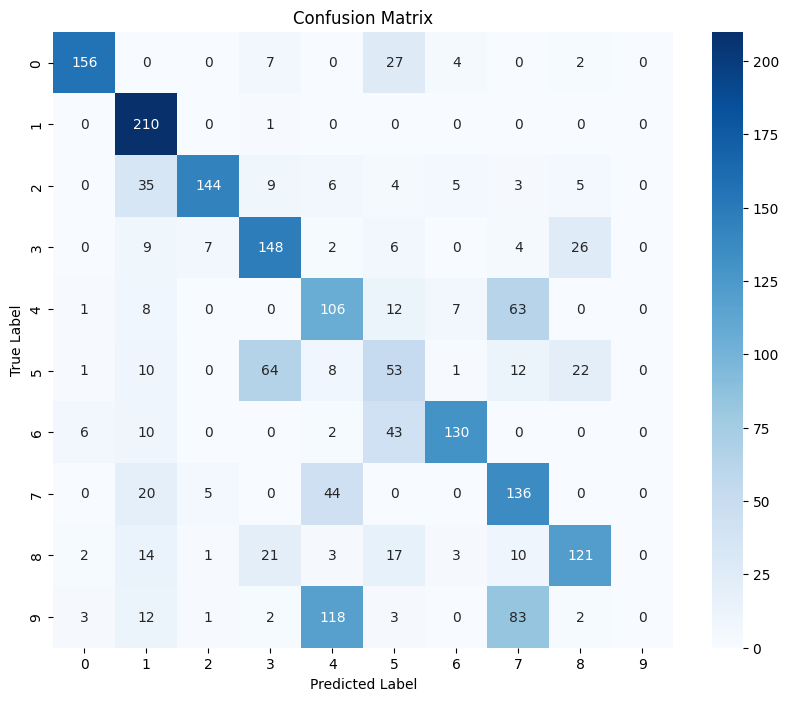

In [ ]:
# Строим матрицу ошибок
cm = confusion_matrix(y_test, new_test_labels)

# Визуализируем матрицу ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [ ]:
# Get the row corresponding to the digit in the confusion matrix
confusion_with_digit = cm[9]

# Find the index (digit) with the maximum value excluding the correct prediction
most_confused_digit = np.argmax(confusion_with_digit)
if most_confused_digit == 9:
    #Find the second largest value
    second_largest_index = np.argsort(confusion_with_digit)[-2]
    most_confused_digit = second_largest_index
    print(f"The digit 9 was most often confused with digit {most_confused_digit} (second largest value)")

else:
    print(f"The digit 9 was most often confused with digit {most_confused_digit}")


The digit 9 was most often confused with digit 4


Вычислите точность модели на тестовых данных.

In [ ]:
test_accuracy = accuracy_score(y_test, new_test_labels)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.602


Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от $7$ до $16$. Можно ли уверенно определить оптимальное число кластеров?

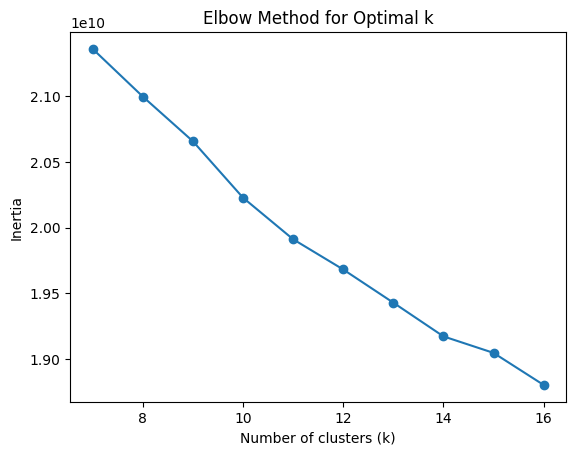

In [ ]:
inertia = []
for k in range(7, 17):
    kmeans = KMeans(n_clusters=k, random_state=41)
    kmeans.fit(X_train_reshaped)
    inertia.append(kmeans.inertia_)

plt.plot(range(7, 17), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>. Используйте параметры, указанные в вашем задании.

In [ ]:
tsne = TSNE(n_components=2, init='random', random_state=41)
X_train_tsne = tsne.fit_transform(X_train_reshaped)

Произведите кластеризацию полученного набора данных при помощи <code>KMeans</code> с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на <b>тренировочных данных</b>.

In [ ]:
kmeans_tsne = KMeans(n_clusters=10, random_state=41)
kmeans_tsne.fit(X_train_tsne)

# Переназначение меток кластеров
cluster_mapping_tsne = {}
labels_tsne = kmeans_tsne.labels_
for i in range(10):
    cluster_indices = np.where(labels_tsne == i)
    true_labels_in_cluster = y_train[cluster_indices]
    most_common_label = Counter(true_labels_in_cluster).most_common(1)[0][0]
    cluster_mapping_tsne[i] = most_common_label

new_labels_tsne = np.array([cluster_mapping_tsne[label] for label in labels_tsne])

# Оценка точности модели на тренировочных данных
accuracy_tsne = accuracy_score(y_train, new_labels_tsne)
print(f"Accuracy after mapping (t-SNE): {accuracy_tsne}")

Accuracy after mapping (t-SNE): 0.838375


Проблема, однако, известна. `t-SNE` — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.